# Examining data
We need to filter down our data before training our text generation model. Ideally the jistings we feed the model will reference the features (e.g. number of rooms) in the descriptions.

In [1]:
import pandas as pd

df = pd.read_json("listings.json")

In [2]:
df.head()

,error_tag,ID,title,suburb,postcode,property_type,room_no,description,advertiser,average_rent,...,flatmate_gender,couples,smokers,pets,occupation,benefits,references,minage,maxage,gender
0,8,9341566,Newly Refurbished HouseShare - Great Transport!,Abbey Wood,SE2,house,5,\n ***NO ADMIN FEES***Come ...,agent,600.0,...,3Females1Male,No,Yes,No,Professional,No,Yes,20.0,35.0,Malesorfemales
1,8,3933359,Master Bedroom Available - Bills Inclusive,Abbey Wood,SE2,house,4,\n A GOOD SIZE DOUBLE ROOM ...,live out landlord,550.0,...,2Males,No,Yes,No,Dontmind,No,No,18.0,50.0,Malesorfemales
2,8,9089446,Double Room close to Abbey Wood Train Station!,Abbey Wood,SE2,flat,4,\n Your search for the idea...,agent,440.0,...,2Males1Female,No,No,No,Dontmind,No,Yes,NaN,NaN,Malesorfemales
3,8,9120472,En-suite Double Room for Couples in Abbey Wood!,Abbey Wood,SE2,house,5,\n Greens Lettings brings t...,agent,625.0,...,2Males2Females,Yes,No,No,Dontmind,No,Yes,NaN,NaN,Malesorfemales
4,8,9110179,'What?? Spend Less And Get More!',Abbey Wood,SE2,house,4,\n You will love this gorge...,agent,562.5,...,1Female1Male,No,Yes,No,Dontmind,No,Yes,23.0,40.0,Malesorfemales


In [3]:
example = df[df.advertiser=="agent"].sample(n=1)
print(example.description.values[0])


                    We are proud to offer a double room in Fulham area just minutes away from Putney Bridge Station.The room is furnished with double bed, bedside table, wardrobe and chest of drawers.The communal area is clean and tidy which comprises a fully furnished kitchen, with fridge and freezer, washing machine, microwave and all kitchen appliances.One full-size bathroom to be shared.We offer weekly cleaning and maintenance service, also Wi-Fi as a courtesy.Admin Fee: £200 which covers all the rental procedures and giving all the customer service support during your stay.PLEASE, NO DSS.Please, provide your *email address and *contact number for the viewing confirmation so that we can send the viewing confirmation with flat address details and all information for the rental procedure. Couple Welcome: £980 (with all the bills included)



In [4]:
from pprint import pprint
d = example.to_dict()
desc = d.pop("description")
print(desc.values())
print()
pprint(d)

dict_values(['\n                    We are proud to offer a double room in Fulham area just minutes away from Putney Bridge Station.The room is furnished with double bed, bedside table, wardrobe and chest of drawers.The communal area is clean and tidy which comprises a fully furnished kitchen, with fridge and freezer, washing machine, microwave and all kitchen appliances.One full-size bathroom to be shared.We offer weekly cleaning and maintenance service, also Wi-Fi as a courtesy.Admin Fee: £200 which covers all the rental procedures and giving all the customer service support during your stay.PLEASE, NO DSS.Please, provide your *email address and *contact number for the viewing confirmation so that we can send the viewing confirmation with flat address details and all information for the rental procedure. Couple Welcome: £980 (with all the bills included)\n'])

{'ID': {12575: 9219220},
 'advertiser': {12575: 'agent'},
 'average_rent': {12575: 850.0},
 'balcony_patio': {12575: 'No'},
 

What could be useful information?

<H> Advert <R> Title <T> title
<H> Prooperty <R> is located in <T> Suburb
<H> Advert <R> Written by <T> advertiser
<H> Room <R> costs <T> average_rent
<H> Property <R> has balcony <T> balcony_patio
<H> Price <R> includes bills <T> bills_included
<H> Flatmates <R> have occupation <T> flatmate_accupation
<H> Property <R> is furnished <T> furnishings
<H> Property <R> has garden or terrace <T> garden_terrace
<H> Property <R> has living room <T> living_room
<H> Property <R> contains rooms <T> num_rooms
<H> Property <R> is located in <T> postcode
<H> Property <R> is a <T> property_type
<H> Tenant <R> references required <T> references
<H> Property <R> distance to public transport <T> train_distance

In [5]:
df.columns

Index(['error_tag', 'ID', 'title', 'suburb', 'postcode', 'property_type',
       'room_no', 'description', 'advertiser', 'average_rent',
       'train_distance', 'deposit', 'bills_included', 'fees_apply',
       'furnishings', 'parking', 'garage', 'garden_terrace', 'balcony_patio',
       'diasbled_access', 'living_room', 'broadband', 'num_housemates',
       'num_rooms', 'flatmate_ages', 'flatmate_smokers', 'household_pets',
       'flatmate_occupation', 'flatmate_gender', 'couples', 'smokers', 'pets',
       'occupation', 'benefits', 'references', 'minage', 'maxage', 'gender'],
      dtype='object')

In [6]:
import numpy as np
def graphify_advert(advert):
    source = "translate Graph to English: "
    source += f'<H> Advert <R> Title <T> {advert["title"]} '
    source += f'<H> Property <R> is located in <T> {advert["suburb"]} '
    source += f'<H> Advert <R> Written by <T> {advert["advertiser"]} '
    source += f'<H> Room <R> costs <T> {advert["average_rent"]} '
    source += f'<H> Property <R> has balcony <T> {advert["balcony_patio"]} '
    source += f'<H> Price <R> includes bills <T> {advert["bills_included"]} '
    source += f'<H> Flatmates <R> have occupation <T> {advert["flatmate_occupation"]} '
    source += f'<H> Property <R> is furnished <T> {advert["furnishings"]} '
    source += f'<H> Property <R> has garden or terrace <T> {advert["garden_terrace"]} '
    source += f'<H> Property <R> has living room <T> {advert["living_room"]} '
    source += f'<H> Property <R> contains rooms <T> {advert["num_rooms"]} '
    source += f'<H> Property <R> has location postcode <T>  {advert["postcode"]} '
    source += f'<H> Property <R> is a <T> {advert["property_type"]} '
    source += f'<H> Tenant <R> references required <T>  {advert["references"]} '
    source += f'<H> Property <R> distance to public transport <T> {advert["train_distance"]} '
    return source

def graphify_advert(advert):
    source = "translate Graph to English: "
#     if advert["title"]:
#         source += f'Advert: {advert["title"]} '
    try:
        if advert["suburb"]:
            source += f'Suburb: {advert["suburb"]} # '
#         if advert["advertiser"]:
#             source += f'Advertiser: {advert["advertiser"]} # '
        if advert["average_rent"]:
            if not np.isnan(advert["average_rent"]):
                source += f'Rent: {advert["average_rent"]} # '
        if advert["balcony_patio"].lower() == "yes":
            source += f'Balcony or patio: {advert["balcony_patio"]} # '
        if advert["bills_included"].lower() == "yes":
            source += f'Bills included: {advert["bills_included"]} # '
        if advert["flatmate_occupation"]:
            source += f'Flatmates occupation: {advert["flatmate_occupation"]} # '
        if advert["furnishings"].lower() == "yes":
            source += f'Funished: {advert["furnishings"]} # '
        if advert["garden_terrace"].lower() == "yes":
            source += f'Garden or terrace: {advert["garden_terrace"]} # '
        if advert["living_room"].lower() == "yes":
            source += f'Living room: {advert["living_room"]} # '
        if advert["num_rooms"]:
            if not np.isnan(advert["num_rooms"]):
                source += f'Number of rooms: {advert["num_rooms"]} # '
        if advert["postcode"]:
            source += f'Postcode: {advert["postcode"]} # '
        if advert["property_type"]:
            source += f'Type {advert["property_type"]} # '
#         if advert["references"].lower() == "yes":
#             source += f'References: {advert["references"]} # '
#         if advert["train_distance"]:
#             if not np.isnan(advert["train_distance"]):
#                 source += f'Public transport: {advert["train_distance"]} # '
    except AttributeError:
        pass
    return source

def hashify_advert(advert):
    source = "translate Hashtags to English: "
#     if advert["title"]:
#         source += f'Advert: {advert["title"]} '
    try:
        if advert["suburb"]:
            source += f'#{advert["suburb"].replace(" ", "_")} '
#         if advert["advertiser"]:
#             source += f'Advertiser: {advert["advertiser"]} # '
        if advert["average_rent"]:
            if not np.isnan(advert["average_rent"]):
                source += f'#rent_{int(advert["average_rent"])} '
        if advert["balcony_patio"].lower() == "yes":
            source += f'#balcony '
        if advert["bills_included"].lower() == "yes":
            source += f'#bills_included '
        if advert["flatmate_occupation"]:
            source += f'#{advert["flatmate_occupation"].lower()} '
        if advert["furnishings"].lower() == "yes":
            source += f'#funished '
        if advert["garden_terrace"].lower() == "yes":
            source += f'#garden '
        if advert["living_room"].lower() == "yes":
            source += f'#living_room '
        if advert["num_rooms"]:
            if not np.isnan(advert["num_rooms"]):
                source += f'#{int(advert["num_rooms"])}_bedrooms '
        if advert["postcode"]:
            source += f'#postcode_{advert["postcode"]} '
        if advert["property_type"]:
            source += f'#{advert["property_type"]} '
#         if advert["references"].lower() == "yes":
#             source += f'References: {advert["references"]} # '
#         if advert["train_distance"]:
#             if not np.isnan(advert["train_distance"]):
#                 source += f'Public transport: {advert["train_distance"]} # '
    except AttributeError:
        pass
    return source

def gptify_advert(advert):
    source += f'Advert: {advert["title"]} '
    source += f'Suburb: {advert["suburb"]} '
    source += f'Advertiser: {advert["advertiser"]} '
    source += f'Rent: {advert["average_rent"]} '
    source += f'Balcony or patio: {advert["balcony_patio"]} '
    source += f'Bills included: {advert["bills_included"]} '
    source += f'Flatmates occupation: {advert["flatmate_occupation"]} '
    source += f'Funished: {advert["furnishings"]} '
    source += f'Garden or terrace: {advert["garden_terrace"]} '
    source += f'Living room: {advert["living_room"]} '
    source += f'Number of rooms: {advert["num_rooms"]} '
    source += f'Postcode: {advert["postcode"]} '
    source += f'Type {advert["property_type"]} '
    source += f'References: {advert["references"]} '
    source += f'Public transport: {advert["train_distance"]} '
    return source

In [7]:
source = []
for i, row in df.iterrows():
#     source.append(graphify_advert(row))
    source.append(hashify_advert(row))

In [8]:
df["source"] = source
df["n_attrs"] = df["source"].apply(lambda x: len(x.split("#"))-1)

In [9]:
df["labels"] = df["description"].apply(lambda x: x.strip().replace("\n", "").replace("*", ""))

In [10]:
agent = df[df["advertiser"] == "agent"][["source", "labels", "n_attrs"]]
flatmates = df[df["advertiser"].isin(["former flatmate", "current flatmate", "current tenants"])][["source", "labels"]]

In [11]:
flatmates.shape

(9096, 2)

In [12]:
agent.shape

(8702, 3)

In [13]:
flatmates.head()

,source,labels
6,translate Hashtags to English: #Abbey_Wood #re...,"Hello Everyone,we are looking for ONE wonderfu..."
17,translate Hashtags to English: #Abbey_Wood #re...,Single bedroom to rent.Current tenant is movin...
18,translate Hashtags to English: #Abbey_Wood #re...,"Key Features:- £520pcm bills inc (gas, electri..."
20,translate Hashtags to English: #Abbey_Wood #re...,Single bedroom to rent in a newly refurbished ...
21,translate Hashtags to English: #Abbey_Wood #re...,Hey there I’m renting a lovely room in my flat...


In [14]:
flatmates.source.values[100]

'translate Hashtags to English: #Gunnerbury_Park #rent_650 #bills_included #professional #2_bedrooms #postcode_W3 #house '

<AxesSubplot:>

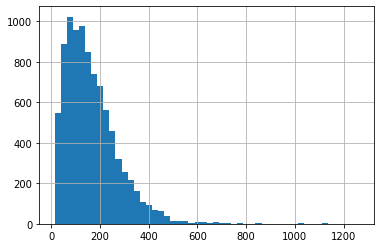

In [15]:
flatmates["length"] = flatmates["labels"].apply(lambda x: len(x.split()))
flatmates["length"].hist(bins=50)

<AxesSubplot:>

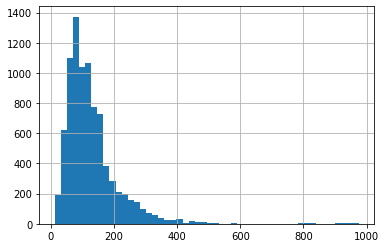

In [16]:
agent["length"] = agent["labels"].apply(lambda x: len(x.split()))
agent["length"].hist(bins=50)

In [17]:
short_agent_text = agent[(agent["length"] < 256) & (agent["n_attrs"] > 6)]
short_agent_text[["source", "labels"]].iloc[:3000].to_csv("agent_train.csv", index=False)
short_agent_text[["source", "labels"]].iloc[3000:].to_csv("agent_test.csv", index=False)

<AxesSubplot:>

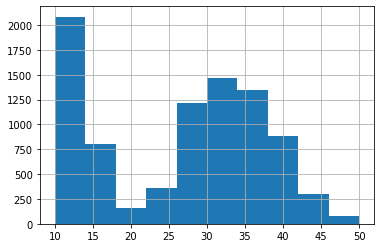

In [44]:
agent["source_length"] = agent["source"].apply(lambda x: len(x.split()))
agent.source_length.hist()

In [21]:
df["length"] = df["labels"].apply(lambda x: len(x.split()))
all_df = df[(df["length"] > 100) & (df["n_attrs"] > 4) & (df.advertiser != "agent")]
all_df[["source", "labels"]].iloc[:8500].to_csv("noagent_train.csv", index=False)
all_df[["source", "labels"]].iloc[8500:].to_csv("noagent_test.csv", index=False)

In [19]:
from sklearn.model_selection import train_test_split

In [32]:
train, test = train_test_split(all_df, train_size=0.99)

In [33]:
train[["source", "labels"]].to_csv("noagent_train.csv", index=False)
test[["source", "labels"]].to_csv("noagent_test.csv", index=False)

In [30]:
a.shape

(8495, 42)

In [31]:
b.shape

(86, 42)

In [52]:
sample = all_df.sample(n=1)
print(sample.source.values)
print(sample.labels.values)

['translate Hashtags to English: #London_E7 #rent_400 #bills_included #garden #3_rooms #postcode_E7 #house ']
["Large single room available for rent. Ideal and suitable for single FEMALE only. Spacious and furnished room in a nice and clean house. Smoke and pet free house. Comes with shared Garden, kitchen and bathroom.Located in Forest Gate, London, E7 postcode.Rent: £400 Deposit: £250Bills include Broadband 100Meg, Gas, Electricity, Water and Council Tax. No bill to pay. No DSS please.Easy and quick access to Olympic park, Shopping centre, Cafe, Restaurants, Banks, Libraries, Primary/ Secondary Schools, Sports complex, leisure Centre, West Ham Park, Buses, Underground and train stations.Upton Park Tube Station 7 min by walk.Buses: 401, 238, 330, 58, 86, 25. Including Night Buses all close by.Romford Road is 5 min by walk and green street is 1 min by walkOlympic Park, Stratford Internation Station and Westfield Shopping Centre is 12 min by bus. 30 minutes to Oxford Street by train.Nea

<AxesSubplot:>

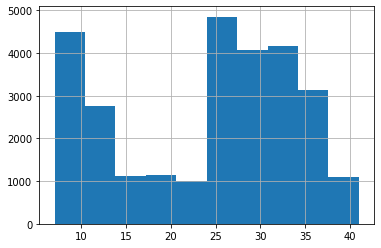

In [79]:
df["source_length"] = df["source"].apply(lambda x: len(x.split()))
df.source_length.hist()

<AxesSubplot:>

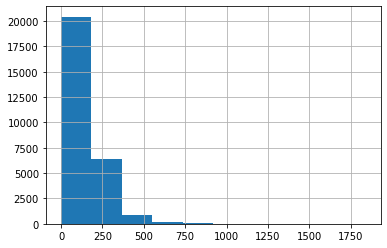

In [83]:
df.length.hist()